In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
#importing libraries

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
# loading data

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

#data cleanup

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

## Customising line chart from Lesson 12
### Chart Prep

In [3]:
df_DA['job_month_num'] = df_DA['job_posted_date'].dt.month
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_month_num', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_pivot.loc['Total Sum'] = df_DA_pivot.sum()
df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_month_num,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [4]:
df_DA_pivot.loc['Total Sum'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total Sum'].sort_values(ascending=False).head(5).index]
df_DA_pivot = df_DA_pivot.drop('Total Sum')
# filtering top 5 skills

In [5]:
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_month_num'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_month_num')
# Use month names for plotting


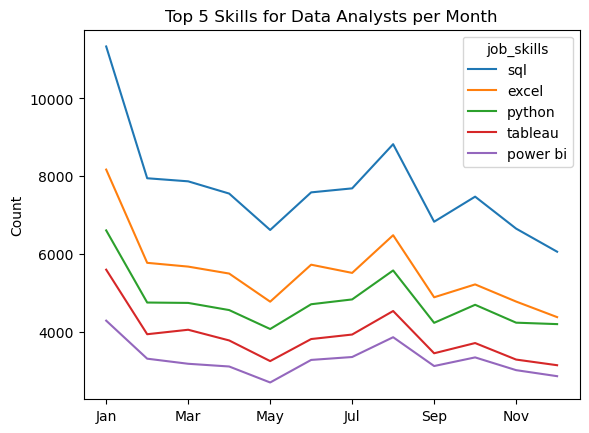

In [6]:
df_DA_pivot.plot(kind='line')
plt.title('Top 5 Skills for Data Analysts per Month')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

# plot the chart

To customise this chart, we can adjust even more parameters in the df.plot() line graph above. This includes:
- linewidth
- linestyle
- colormap
- markersize
- marker

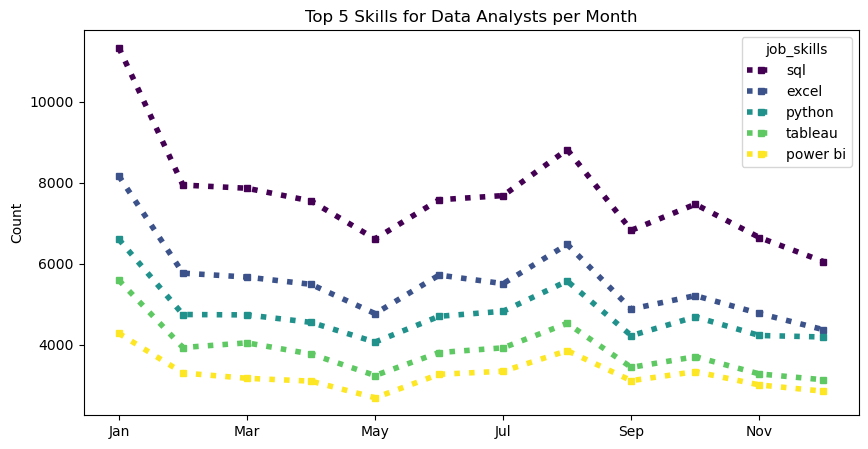

In [17]:
df_DA_pivot.plot(
    kind='line',
    linewidth=4, # incerases thickness of the line
    linestyle=':', # this creates a dottled line. Other options include: '-', '--', '-.', ':'
    colormap='viridis', # creates a new colorway. Other options include: plasma, inferno, blues etc. Refer to cheatsheet
    marker='s', # plots markers for each point. Options incliude: 'x', '+', '*', 's', ',', '.', '1'
    markersize=5, 
    figsize=(10, 5)  # specifies the width along with the height of the figure
)

plt.title('Top 5 Skills for Data Analysts per Month')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

# plot the chart


Note: although we are using the plot method from Pandas, we are using the 'line' method from matplotlib. To find out what parameters are available for each graph type, you can go to the matplotlib library and look under the pyplot module

## Customising scatter plot from Lesson 15
### Chart Prep

In [18]:
df_explode = df_DA.explode('job_skills')
# explode skills

skill_stats = df_explode.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'), 
    median_salary = ('salary_year_avg', 'median') 
)
#groupby each individual skill

skill_count=20

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)
#filtering top 20 skils
skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


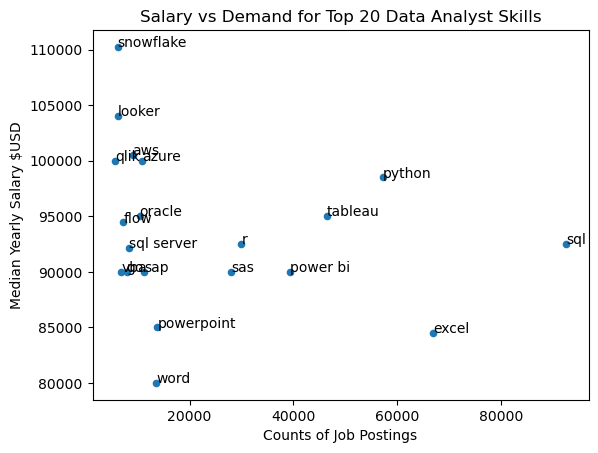

In [20]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')  
plt.xlabel('Counts of Job Postings')
plt.ylabel('Median Yearly Salary $USD')
plt.title('Salary vs Demand for Top 20 Data Analyst Skills')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].loc[txt], skill_stats['median_salary'].loc[txt], txt)

plt.show()

For this chart, we want to alter it so 
- labels do not overlap each other (and provides arrows assigning labels to its associated point)

We can do this by using the adjust_text() function from the adjustText module. First, we need to install this module in the terminal and then import it:

In [21]:
from adjustText import adjust_text
# for adjust_text(), we need to provide the paranter of 'texts' which is a list of matplotlib text objects
# to adjust alongside its corresponding cooridnates

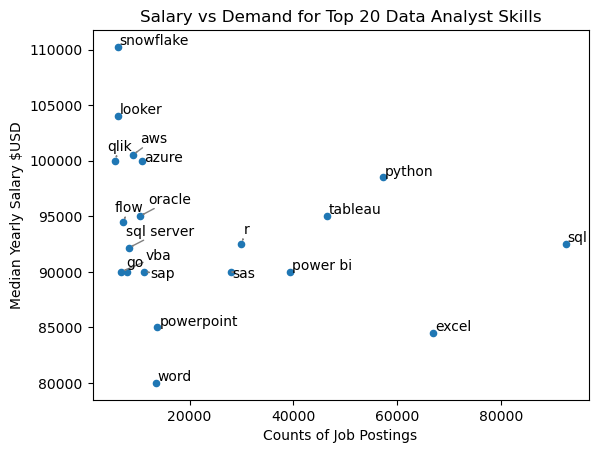

In [29]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')  
plt.xlabel('Counts of Job Postings')
plt.ylabel('Median Yearly Salary $USD')
plt.title('Salary vs Demand for Top 20 Data Analyst Skills')

text_list = [] # empty list we append to, and then feed this to the adjust_text function

for i, txt in enumerate(skill_stats.index):
    text_list.append(plt.text(skill_stats['skill_count'].loc[txt], skill_stats['median_salary'].loc[txt], txt))

adjust_text(text_list, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

plt.show()
# arrowprops=dict(arrowstyle='->', color='gray', lw=1)) : this code is used to provide arrows

In [30]:
text_list

[Text(94530.98076234879, 93040.001953125, 'sql'),
 Text(70695.62528981855, 85019.001953125, 'excel'),
 Text(62252.06347026209, 99040.00195312501, 'python'),
 Text(51913.852293346776, 95540.001953125, 'tableau'),
 Text(45548.26261340726, 90540.001953125, 'power bi'),
 Text(30894.592004788312, 93787.50455729169, 'r'),
 Text(30438.649259072583, 89819.99934895834, 'sas'),
 Text(21757.776461693546, 85540.001953125, 'powerpoint'),
 Text(17186.004584173388, 80540.001953125, 'word'),
 Text(14803.003792842746, 89819.99934895834, 'sap'),
 Text(15025.17507560484, 100220.00260416666, 'azure'),
 Text(16242.641116431454, 96440.00520833334, 'oracle'),
 Text(13195.246786794358, 101940.00520833334, 'aws'),
 Text(14263.88015372984, 93590.00520833334, 'sql server'),
 Text(9576.322618447584, 90815.0068359375, 'go'),
 Text(8293.055720766128, 95800.0048828125, 'flow'),
 Text(14038.490408266132, 91445.00911458334, 'vba'),
 Text(10755.93999495968, 104540.001953125, 'looker'),
 Text(13236.031489415322, 110780.

We now want to format the y-values of the y-axis so that it is in dollars($). This will require using the class:

- matplotlib.ticker.FuncFormatter(func)

whereby func is a user-defined function (lambda function) for formatting. The function should take in two inputs (a tick value 'x' and a position 'pos'), and return a string containing the corresponding tick label. 
Pos serves as an index for each y label here

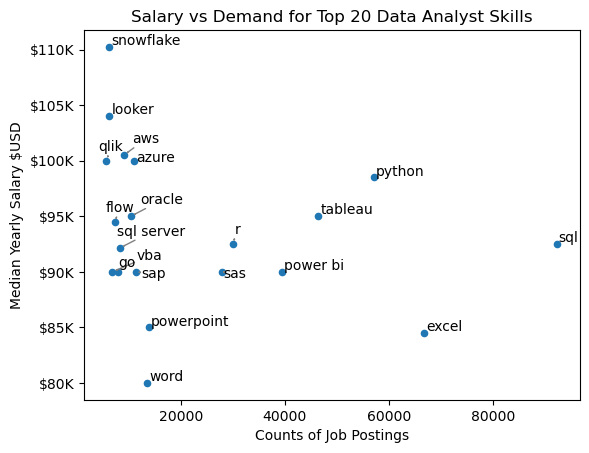

In [35]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')  
text_list = []
for i, txt in enumerate(skill_stats.index):
    text_list.append(plt.text(skill_stats['skill_count'].loc[txt], skill_stats['median_salary'].loc[txt], txt))
adjust_text(text_list, arrowprops=dict(arrowstyle='->', color='gray', lw=1)) 


ax = plt.gca() # this is used to access the axis of the plot. This must come after we have created our plot. 
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
# this code edits the values of the y-axis using the Func_Formatter, lambda function and f string

plt.xlabel('Counts of Job Postings')
plt.ylabel('Median Yearly Salary $USD')
plt.title('Salary vs Demand for Top 20 Data Analyst Skills')
plt.show()

We can repeat this same code to now format the x-axis values so they are comma separated

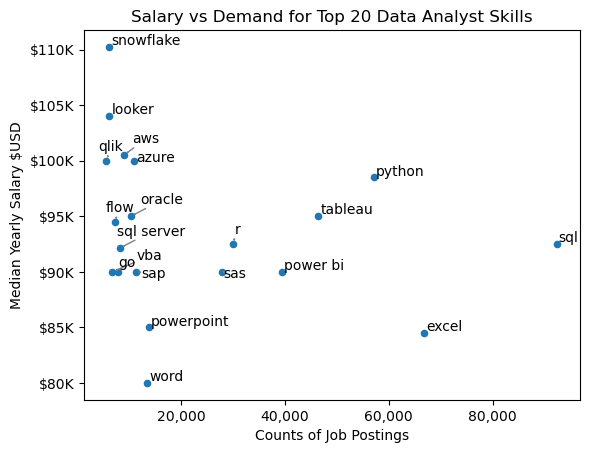

In [ ]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')  
text_list = []
for i, txt in enumerate(skill_stats.index):
    text_list.append(plt.text(skill_stats['skill_count'].loc[txt], skill_stats['median_salary'].loc[txt], txt))

adjust_text(text_list, arrowprops=dict(arrowstyle='->', color='gray', lw=1)) 


ax = plt.gca() # this is used to access the axis of the plot. This must come after we have created our plot. 
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
# this code edits the values of the y-axis using the Func_Formatter, lambda function and f string
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x):,}'))


plt.xlabel('Counts of Job Postings')
plt.ylabel('Median Yearly Salary $USD')
plt.title('Salary vs Demand for Top 20 Data Analyst Skills')
plt.show()